Estimación del tiempo de llegada por medio de una red neuronal
==

In [1]:
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Este es un ejemplo de señal sísmica para el campo de desplazamiento, la linea azul más a la izquiera es el tiempo de llegada de la onda P y la linea vertical más a la derecha es el tiempo de llegada de la onda s.

In [2]:
from seismic_source import SeismicEvent
import matplotlib.pylab as plt

importado!


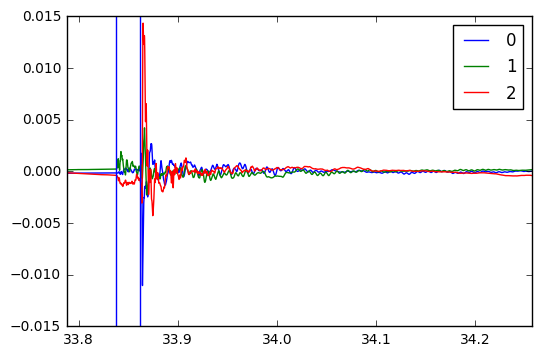

In [4]:
e = SeismicEvent.evento("../data-sets/1998_aug_07_16_24_33.i6b")
seis_info = e.seismograms[1]
seis_info.data.plot()
plt.axvline(x=seis_info.data.index[seis_info.P_pick])
plt.axvline(x=seis_info.data.index[seis_info.S_pick])

Estimación de la llegada de la onda p y s
==
Usaremos una red neuronal para estimar el tiempo de llegada de la onda P y S

In [2]:
import numpy as np # matrix operations
import pandas as pd # dataframes

In [3]:
#leer el data set del sismo
from seismic_source import SeismicEvent

In [ ]:
"""

Objetivo: Generar los datos de entrenamiento
Secuencia de pasos

0. Seleccionar un sismograma de un evento sismico

1. Agregar columnas con un cumsum del cuadrado de los datos dividido por el maximo del cumsum
   de los cuadrados de los datos (información global)
   
2. Seleccionar los datos del sismograma

3. Generar una columna indicando el indice en donde ocurre la llegada de la onda P

4. Generar una columna indicando el indice en donde ocurre la llegada de la onda S

5. eliminar el indice temporal para generar un indice autoincremental

6. Seleccionar un ancho de ventana de datos para el sismo

7. Separar las entradas y las salidas en los datos de entrenamiento

"""

e = SeismicEvent.evento("../data-sets/1998_aug_07_16_24_33.i6b")

for seismogram in e.seismograms:

    data = seismogram.data # (1)

    data[['c0','c1','c2']] = (data**2).cumsum()/(data**2).cumsum().max() # (2)

    p_indicator = np.zeros(data.shape[0])
    p_indicator[e.seismograms[0].P_pick] = 1 
    p_df = pd.DataFrame(data= p_indicator, index=data.index) 
    data['p'] = p_df # (3)

    s_indicator = np.zeros(data.shape[0])
    s_indicator[e.seismograms[0].S_pick] = 1 
    s_df = pd.DataFrame(data= s_indicator, index=data.index) 
    data['s'] = s_df # (4)

    data.index = pd.DataFrame(range(data.index.values.shape[0])) #(5)

    n = 50 # (6)

    N = data.shape[0]
    for i in np.arange(N - n):
        case = data[i:(i + n)]
        trainning_case = np.hstack((case[0].values,
                                   case[1].values,
                                   case[2].values,
                                   case['c0'].values,
                                   case['c1'].values,
                                   case['c2'].values,
                                   case.p.sum(),
                                   case.s.sum()))
        
        try:
            final_trainning_data = np.vstack((final_trainning_data, trainning_case))
        except NameError:
            final_trainning_data = trainning_case

In [ ]:
X = final_trainning_data[:, 0:(3*n)] 
Y = final_trainning_data[:, 3*n:(3*n+2)] # (7)

importado!


In [36]:
final_trainning_data.shape

(4038, 302)

In [29]:
#construccion del modelo
from keras.models import Sequential
from keras.layers import Dense

In [31]:
model = Sequential()
model.add(Dense(X.shape[1], input_dim=X.shape[1], init='uniform', activation='relu'))
#model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(2, init='uniform', activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, nb_epoch=150, batch_size=10)

Epoch 1/150
4038/4038 [==============================] - 3s - loss: 0.1964 - acc: 0.9861     
Epoch 2/150
4038/4038 [==============================] - 2s - loss: 0.0657 - acc: 0.9876     
Epoch 3/150
4038/4038 [==============================] - 2s - loss: 0.0649 - acc: 0.9876     
Epoch 4/150
4038/4038 [==============================] - 2s - loss: 0.0642 - acc: 0.9876     
Epoch 5/150
4038/4038 [==============================] - 3s - loss: 0.0634 - acc: 0.9876     
Epoch 6/150
4038/4038 [==============================] - 2s - loss: 0.0624 - acc: 0.9876     
Epoch 7/150
4038/4038 [==============================] - 2s - loss: 0.0617 - acc: 0.9876     
Epoch 8/150
4038/4038 [==============================] - 2s - loss: 0.0605 - acc: 0.9876     
Epoch 9/150
4038/4038 [==============================] - 2s - loss: 0.0597 - acc: 0.9876     
Epoch 10/150
4038/4038 [==============================] - 2s - loss: 0.0583 - acc: 0.9876     
Epoch 11/150
4038/4038 [==============================] - 2

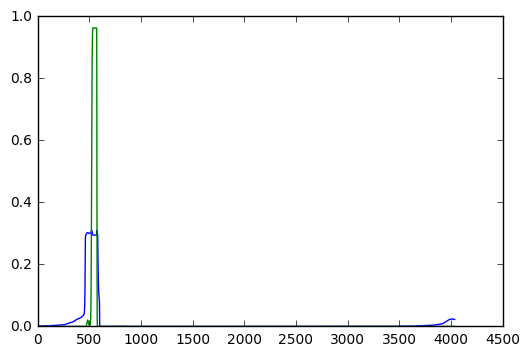

In [17]:
predictions = model.predict(X)
plt.plot(predictions)

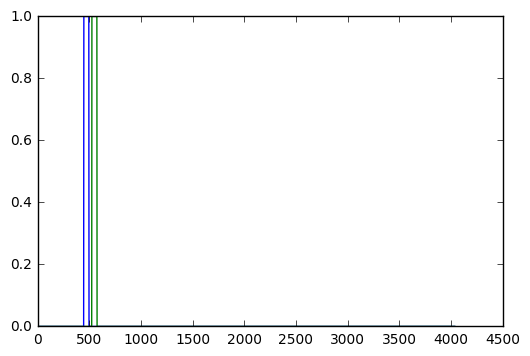

In [16]:
plt.plot(Y)